In [123]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif,mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix
import time
df=pd.read_csv('/content/drive/MyDrive/smdm_data.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1


In [124]:
data=df.iloc[:,:22]
data=data.to_numpy()

In [125]:
data=shuffle(data)

In [345]:
X=data[:,:21]
Y=data[:,21]


<Figure size 1440x720 with 0 Axes>

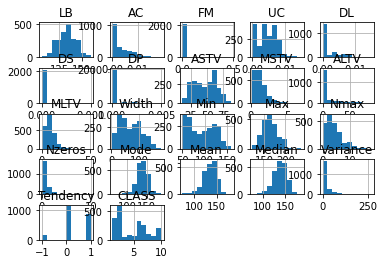

In [346]:
fig = plt.figure(figsize =(20,10)) #αρκετά ιστογράμματα δείχνουν να προσαρμόζονται καλά ως προς την κανονική κατανομή επομένως θα κάνουμε τυποποίηση αντί normalization
df.iloc[:,:22].hist()
plt.show()

In [347]:
pca=PCA()
scaler=StandardScaler() 
X=scaler.fit_transform(X) 
X=pca.fit_transform(X)
np.round(pca.explained_variance_ratio_,4)

array([0.2885, 0.167 , 0.0869, 0.0713, 0.058 , 0.0486, 0.0468, 0.0441,
       0.0363, 0.0305, 0.0275, 0.0237, 0.0185, 0.0156, 0.0126, 0.0086,
       0.0063, 0.0056, 0.0024, 0.0013, 0.    ])

In [348]:
# Feature Selection
Z=pd.DataFrame(X)
W=pd.DataFrame(Y)
selector=SelectKBest(f_classif,k=15)
selector.fit(Z,W)
selector.transform(Z)
Z.columns[selector.get_support()]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Int64Index([0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 17, 18], dtype='int64')

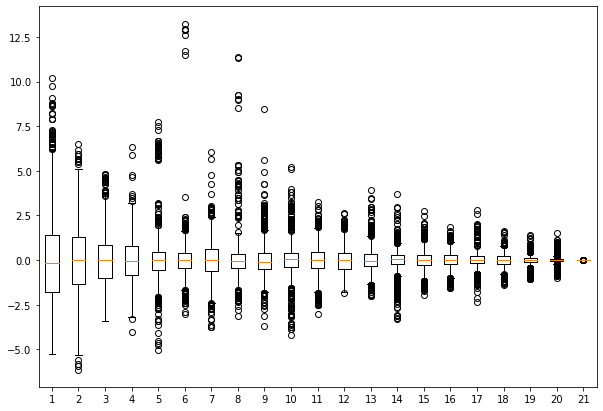

In [349]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(X)
plt.show()

In [350]:
encoder = LabelEncoder().fit(Y)
y_bool = encoder.transform(Y)
y = np_utils.to_categorical(y_bool)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [351]:
X=X[:,:22]

In [352]:
len_data = X.shape[0]
train_size = int(len_data * .7)
valid_size = int(len_data * .1)

In [353]:
xtr = X[:train_size,:]
ytr = y[:train_size,:]
ytr_bool = y_bool[:train_size]

xva = X[train_size:train_size+valid_size,:]
yva = y[train_size:train_size+valid_size,:]
yva_bool = y_bool[train_size:train_size+valid_size]

xte = X[train_size+valid_size:,:]
yte = y[train_size+valid_size:,:]
yte_bool = y_bool[train_size+valid_size:]

In [354]:
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [355]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 11)                132       
                                                                 
 dense_61 (Dense)            (None, 10)                120       
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________
None


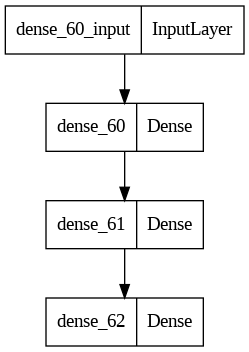

In [356]:
plot_model(model, to_file='model.png')

#Training

In [357]:
start = time.time()
history = model.fit(xtr, ytr, validation_data=(xva, yva), epochs=50, batch_size=1, verbose=0)
end = time.time()
print('execution time:',end - start)

execution time: 143.32343769073486


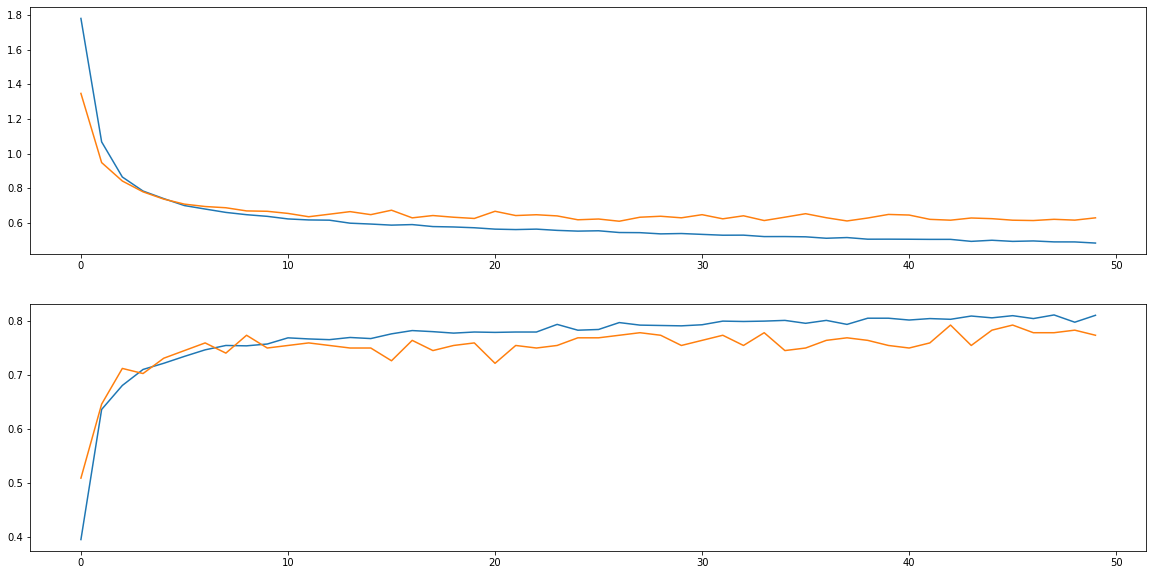

In [358]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [359]:
scores = model.evaluate(xtr, ytr, verbose=0)
print("Train %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train accuracy: 80.85%


In [360]:
ytr_pred = model.predict(xtr, verbose=0)
ytr_pred=np.argmax(ytr_pred,axis=1)
print("Train Accuracy by model.predict: %.2f%%" % (100*sum(ytr_bool == ytr_pred)/ytr.shape[0]))

Train Accuracy by model.predict: 80.85%


In [361]:
yva_pred=model.predict(xva)
yva_pred=np.argmax(yva_pred,axis=1)
print("Val Accuracy by model.predict: %.2f%%" % (100*sum(yva_bool == yva_pred)/yva.shape[0]))

7/7 [==============================] - 0s 2ms/step
Val Accuracy by model.predict: 77.36%


In [362]:
yte_pred = model.predict(xte, batch_size=1, verbose=0)
yte_pred_bool = np.argmax(yte_pred, axis=1)
print("Test Accuracy by model.predict: %.2f%%" % (100*sum(yte_bool == yte_pred_bool)/yte.shape[0]))

Test Accuracy by model.predict: 79.58%


In [363]:
# Matthews correlation coefficient
print("Train MMC: ", matthews_corrcoef(ytr_bool, ytr_pred))
print("Val MMC: ", matthews_corrcoef(yva_bool, yva_pred))
print("Test MMC: ", matthews_corrcoef(yte_bool, yte_pred_bool))

print("---------------TRAIN---------------------")
print(confusion_matrix(ytr_bool, ytr_pred))
print("---------------VAL---------------------")
print(confusion_matrix(yva_bool, yva_pred))
print("---------------TEST---------------------")
print(confusion_matrix(yte_bool, yte_pred_bool))

Train MMC:  0.7714782220920055
Val MMC:  0.7254993437411188
Test MMC:  0.7555646758196376
---------------TRAIN---------------------
[[215  24   1   0   5   3   1   0   0  16]
 [ 13 365   0  18   4  11   0   0   0   0]
 [ 20   4  14   0   0   0   1   0   0   0]
 [  0   9   0  46   0   2   0   0   0   0]
 [ 15  11   0   0  17   0   0   0   0   6]
 [  1   4   2   0   0 212   1   0   0   0]
 [  1   0   0   0   0  33 135   4   0   0]
 [  0   0   0   0   0   1   3  77   0   0]
 [  1   0   0   0   0   0   0   0  31  19]
 [ 35   3   0   0   4   0   0   0   9  91]]
---------------VAL---------------------
[[30  1  1  0  2  1  1  0  0  5]
 [ 3 54  0  1  0  1  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  9  0  0  0  0  0  0]
 [ 4  0  0  0  2  1  0  0  0  1]
 [ 0  6  0  0  0 25  1  0  0  0]
 [ 0  0  0  0  0  1 27  1  0  0]
 [ 0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  2  3]
 [ 7  0  0  0  0  0  0  0  3 11]]
---------------TEST---------------------
[[65  4  1  0  2  1  2  0